# Task 2: MOVIE RATING PREDICTION WITH PYTHON

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Loading Movie dataset

In [2]:
data_movie=pd.read_csv('movies.dat', sep = '::', engine='python', encoding="ISO-8859-1")
data_movie.columns =['MovieIDs','MovieName','Category']
data_movie.dropna(inplace=True)


## Displaying Dataset

In [3]:
data_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


### Rating dataset

In [4]:
data_rating = pd.read_csv("ratings.dat",sep='::', engine='python', encoding="ISO-8859-1")
data_rating.columns =['ID','MovieID','Ratings','TimeStamp']
data_rating.dropna(inplace=True)
data_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


### Users dataset

In [5]:
data_user = pd.read_csv("users.dat",sep='::',engine='python', encoding="ISO-8859-1")
data_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
data_user.dropna(inplace=True)
data_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
data = pd.concat([data_movie, data_rating,data_user], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


## Displaying First five rows

In [7]:
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


## Displaying Last five rows

In [8]:
data.tail()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
1000203,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN
1000204,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN
1000207,NaN,NaN,NaN,6040,1097,4,956715569,NaN,NaN,NaN,NaN,NaN


## Finding information about the Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieIDs    3882 non-null     float64
 1   MovieName   3882 non-null     object 
 2   Category    3882 non-null     object 
 3   ID          1000208 non-null  int64  
 4   MovieID     1000208 non-null  int64  
 5   Ratings     1000208 non-null  int64  
 6   TimeStamp   1000208 non-null  int64  
 7   UserID      6039 non-null     float64
 8   Gender      6039 non-null     object 
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


## Statistical analysis

In [10]:
data.describe()

,MovieIDs,ID,MovieID,Ratings,TimeStamp,UserID,Age,Occupation
count,3882.000000,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000
mean,1986.560793,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08,3021.000000,30.644146,8.146547
std,1146.483260,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07,1743.453469,12.891387,6.329991
min,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,2.000000,1.000000,0.000000
25%,983.250000,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1511.500000,25.000000,3.000000
50%,2010.500000,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3021.000000,25.000000,7.000000
75%,2980.750000,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4530.500000,35.000000,14.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,6040.000000,56.000000,20.000000


## Finding Shape of the data

In [11]:
data.shape

(1000208, 12)

## Finding the Columns of data

In [12]:
data.columns

Index(['MovieIDs', 'MovieName', 'Category', 'ID', 'MovieID', 'Ratings',
       'TimeStamp', 'UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

### Exploratory Data Analysis

### Visualising user age distribution

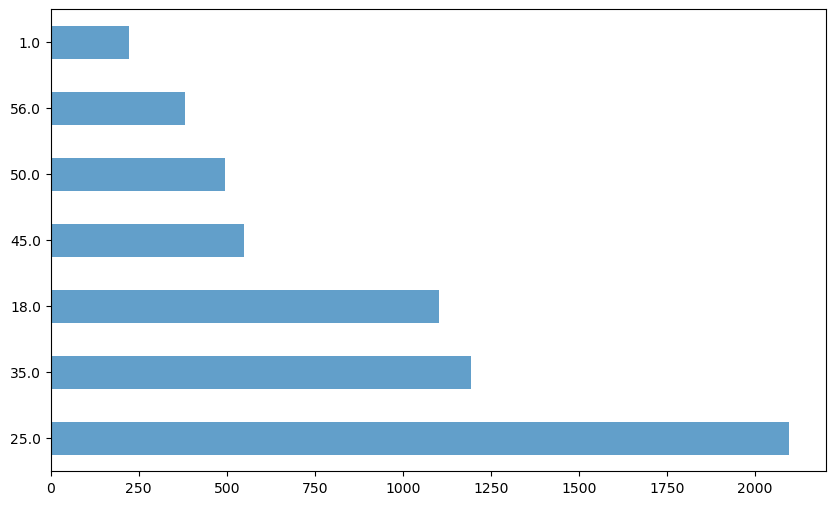

In [13]:
data['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,6))
plt.show()

Text(0.5, 0, 'Age')

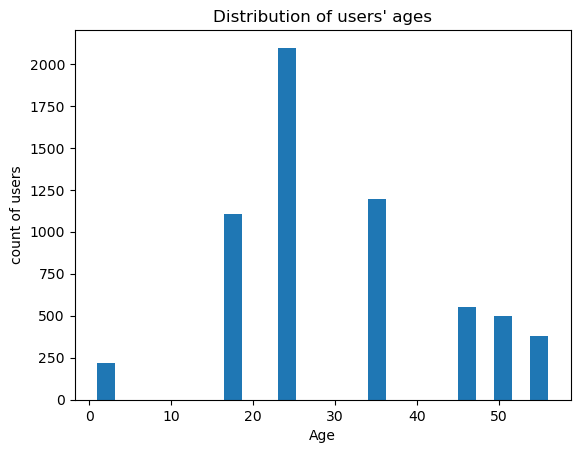

In [14]:
data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [15]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right=False, labels=labels)
data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


## Visualising overall rating by users 

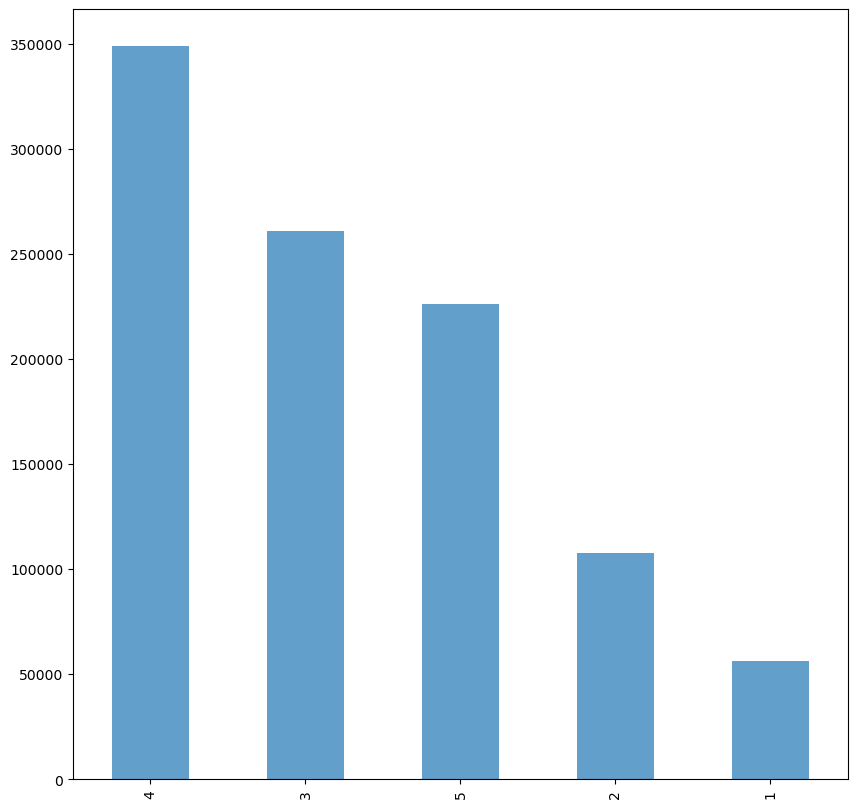

In [16]:
data['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [17]:
groupedby_movieName = data.groupby('MovieName')
groupedby_rating = data.groupby('Ratings')
groupedby_uid = data.groupby('UserID')

In [18]:
movies = data.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [19]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

### Finding and visualising the user rating of the movie “Toy Story”

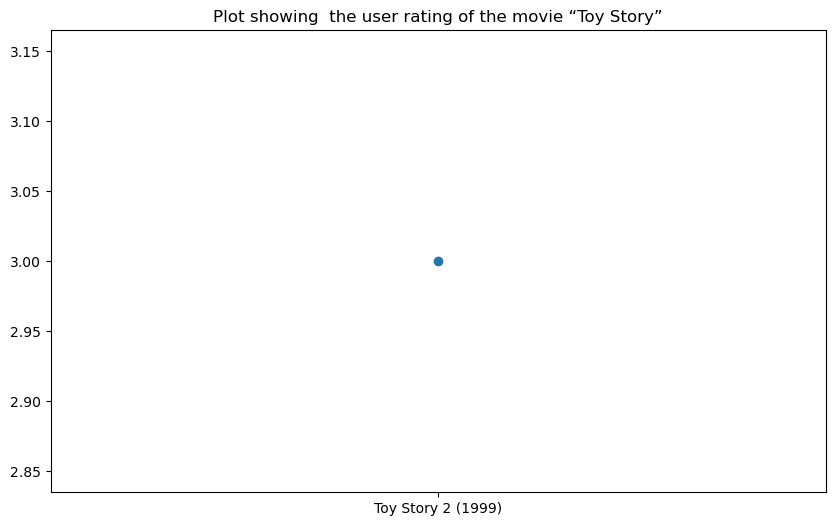

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()


### Finding and visualising the viewership of the movie “Toy Story” by age group

In [21]:
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


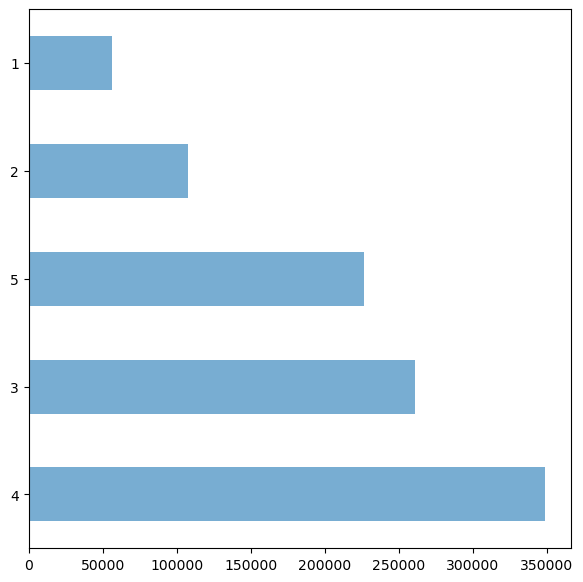

In [22]:
top_25 = data[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

## Visualising the rating data by user of user id = 2695

In [23]:
userid_2695 = groupedby_uid.get_group(2695)
userid_2695[['UserID','Ratings']]

,UserID,Ratings
2693,2695.0,3


### Performing machine learning on first 500 extracted records

In [24]:
first_500 = data[500:]
first_500.dropna(inplace=True)

## Use the features:movie id,age and occupation

In [25]:
features = first_500[['MovieID','Age','Occupation']].values

## Using rating as a label

In [26]:
labels = first_500[['Ratings']].values

## Creating train and test data set

In [27]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

## Histogram for movie

Text(0.5, 0, 'Ratings')

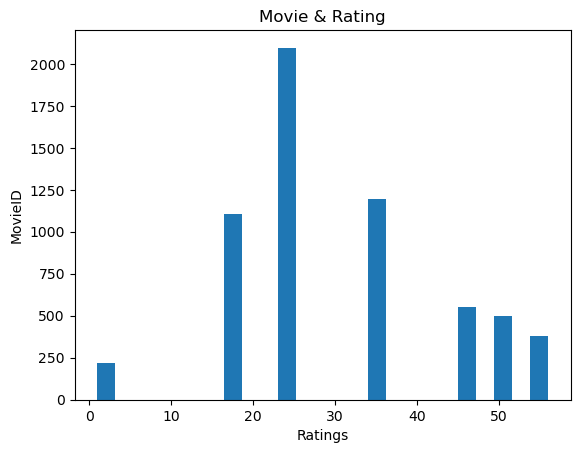

In [28]:
data.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

## Histogram for age

Text(0.5, 0, 'Ratings')

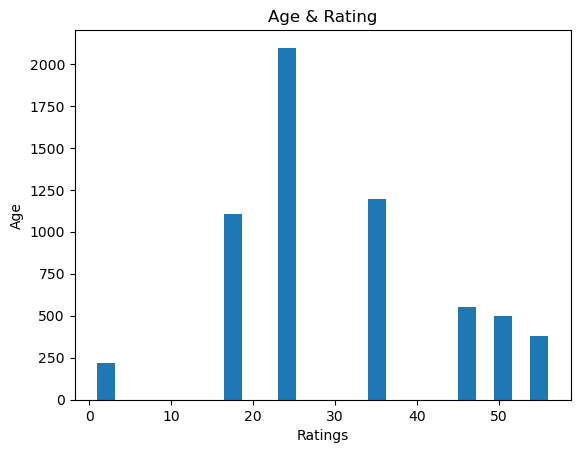

In [29]:
data.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

## Histogram for occupation

Text(0.5, 0, 'Ratings')

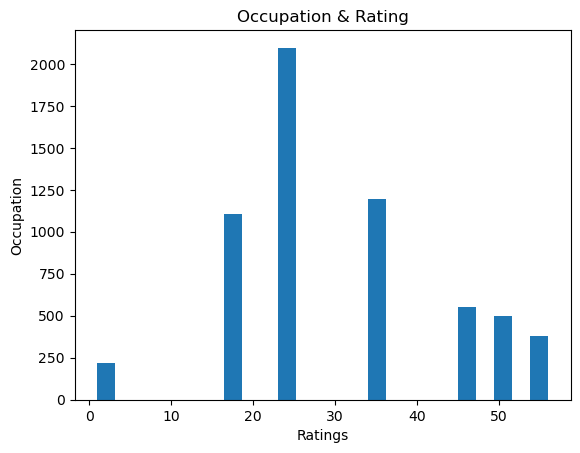

In [30]:
data.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

#### Logistic Regression

In [31]:
Log_reg = LogisticRegression()
Log_reg.fit(train, train_labels)
Y_pred = Log_reg.predict(test)
acc_log = round(Log_reg.score(train, train_labels) * 100, 2)
acc_log

32.76

#### Support Vector Machines

In [32]:
svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

32.94

#### K Nearest Neighbors Classifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

57.31

#### Gaussian Naive Bayes

In [34]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

32.23

#### Linear SVC

In [35]:
linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

15.36

#### Decision Tree

In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

#### Random Forest Classifier

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

98.54

In [38]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest,acc_gaussian,acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
6,Decision Tree,98.54
1,KNN,57.31
0,Support Vector Machines,32.94
2,Logistic Regression,32.76
4,Naive Bayes,32.23
5,Linear SVC,15.36


##Decision Tree and Random Forest have the highest Accuracy Score

# This task is completed by GAGANDEEP KANTA